In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
# Loading the dataset
from tensorflow.keras.datasets.mnist import load_data

In [4]:
(X_train,Y_train),(X_test,Y_test)=load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0] # 0 here donates the black region while higher valued number indicate the white region according to intensity

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

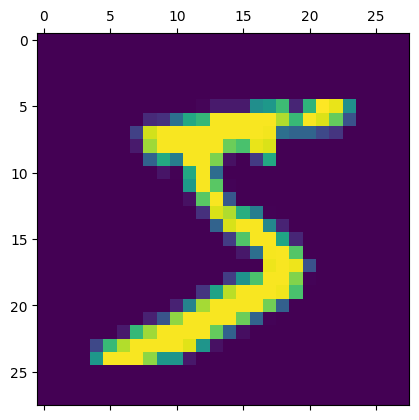

In [9]:
plt.matshow(X_train[0])

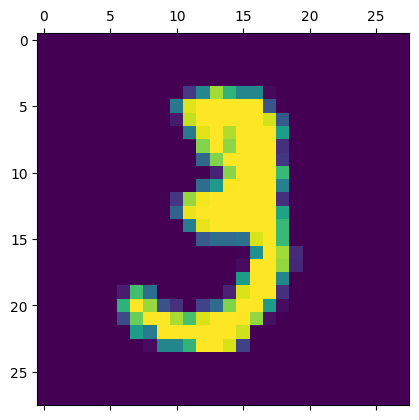

In [10]:
plt.matshow(X_train[10])

In [11]:
Y_train[10]

3

In [12]:
 # Feature Scaling 
X_train = X_train/255
X_test = X_test/255

In [13]:
# Flattening the dataset
X_train = X_train.reshape(len(X_train),28*28)
X_train.shape
X_test = X_test.reshape(len(X_test),28*28)
X_test.shape

(10000, 784)

In [14]:
# Fitting the model
model = keras.Sequential([
    keras.layers.Dense(50,input_shape=(784,),activation="softmax"),
    keras.layers.Dense(10,activation="softmax")
])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,Y_train,epochs=5)

c:\Users\91834\Desktop\Machine Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6219 - loss: 1.6641
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7204 - loss: 0.7775
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7840 - loss: 0.5990
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8341 - loss: 0.5125
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8757 - loss: 0.4415


In [15]:
y_pred = model.predict(X_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7.0636015e-04, 2.4820263e-03, 2.9004489e-03, 4.7535328e-03,
       2.0406634e-04, 1.0443926e-03, 3.7054892e-04, 9.1193128e-01,
       1.5383468e-03, 7.4068993e-02], dtype=float32)

In [16]:
np.argmax(y_pred[10])

0

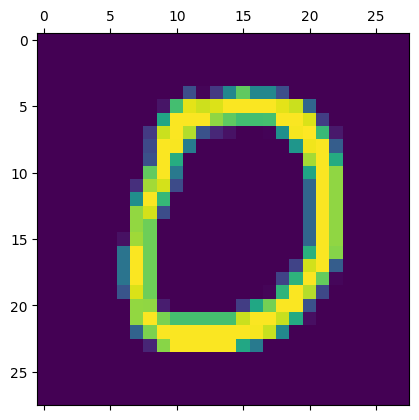

In [17]:
plt.matshow(X_test[10].reshape(28,28))

In [18]:
Y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [19]:
y_predicted=[np.argmax(i) for i in y_pred]
y_predicted[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [20]:
c = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

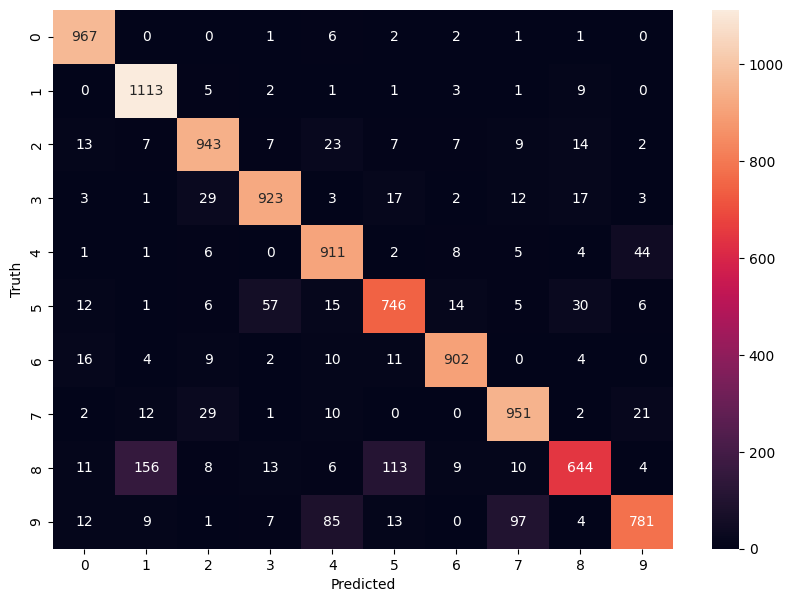

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(c,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
